# Metody Obliczeniowe w Nauce i Technice
## Laboratorium 7
## Singular Value Decomposition

### Zadanie 1 Przekształcenie sfery w elipsoidę

In [1]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 15

s, t = np.mgrid[0:(2 * np.pi):N*1j, 0:np.pi:N*1j]

ball = np.zeros((N, N, 3))
ball[:, :, 0] = np.cos(s) * np.sin(t)
ball[:, :, 1] = np.sin(s) * np.sin(t)
ball[:, :, 2] = np.cos(t)

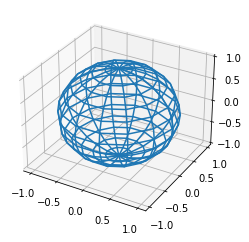

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(ball[:, :, 0], ball[:, :, 1], ball[:, :, 2])

In [4]:
A1 = np.random.uniform(0, 4, size = 9)
A1 = A1.reshape((3,3))
A2 = np.random.uniform(-4, 4, size = 9)
A2 = A2.reshape((3,3))
A3 = np.random.uniform(-2, 2, size = 9)
A3 = A3.reshape((3,3))

In [5]:
def visualize_transformation(ball, trans_mat):
    
    result = np.zeros((30, 30, 3))
    for i in range(N):
        for j in range(N):
            result[i,j] = ball[i, j] @ trans_mat

    fig = plt.figure()
    ax = plt.axes(projection='3d') 
    
    ax.plot_wireframe(result[:, :, 0], result[:, :, 1], result[:, :, 2], linewidth=0.5)
    
    semi_ax_x = np.array([1,0,0]) @ trans_mat
    semi_ax_y = np.array([0,1,0]) @ trans_mat
    semi_ax_z = np.array([0,0,1]) @ trans_mat
    
    ax.plot([0, semi_ax_x[0]], [0, semi_ax_x[1]], [0, semi_ax_x[2]], c='red', linewidth=3)
    ax.plot([0, semi_ax_y[0]], [0, semi_ax_y[1]], [0, semi_ax_y[2]], c='green', linewidth=3)
    ax.plot([0, semi_ax_z[0]], [0, semi_ax_z[1]], [0, semi_ax_z[2]], c='black', linewidth=3)

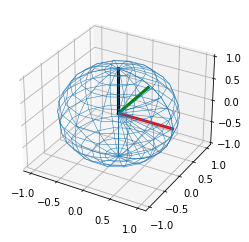

In [6]:
visualize_transformation(ball, np.identity(3))

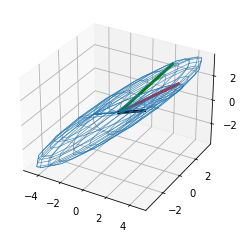

In [7]:
visualize_transformation(ball, A1)

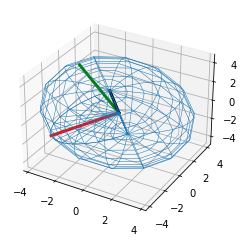

In [8]:
visualize_transformation(ball, A2)

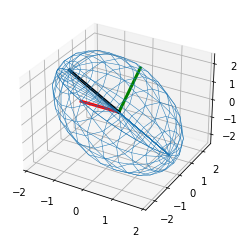

In [9]:
visualize_transformation(ball, A3)

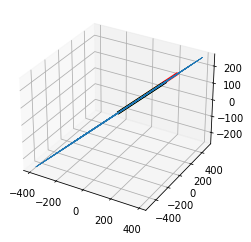

In [10]:
# weird singular values
A4 = np.random.uniform(0, 4, size = 9)
A4 = A4.reshape((3,3))

U, S, VH = np.linalg.svd(A4)
S = np.diag(S)
S[0,0] = S[0,0] * 100

A4 = U @ S @ VH

visualize_transformation(ball, A4)

In [11]:
# transformations seprately
U, S, VH = np.linalg.svd(A4)
S = np.diag(S)

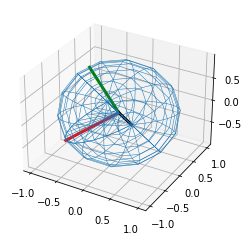

In [12]:
visualize_transformation(ball, VH)

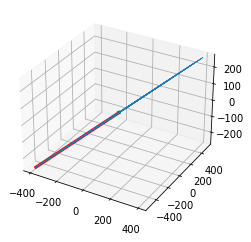

In [13]:
visualize_transformation(ball, S @ VH)

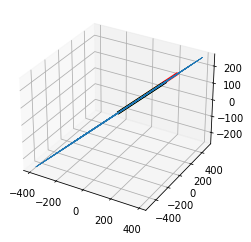

In [14]:
visualize_transformation(ball, U @ S @ VH)

### Zadanie 2 - Kompresja obrazu

In [15]:
import imageio as iio

img = iio.imread('data/lenna.gif')
image_shape = img.shape
print(image_shape)


(512, 512)


In [16]:
U, S_1d, VH = np.linalg.svd(img)
S = np.diag(S_1d)

In [17]:
U.shape, S.shape, VH.shape

((512, 512), (512, 512), (512, 512))

In [18]:
avg_error = []
for k in range(62, 513, 10):
    I = np.zeros(image_shape)
    for i in range(k):
        temp = S_1d[i] * np.outer(U[:,i], np.transpose(VH)[:,i])
        I = np.add(I, temp) 

    # verify that is close to 0 for each entry
    avg_error.append(np.average(I - img))

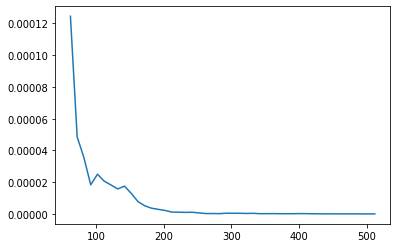

In [19]:
# avg difference as function of k
plt.plot(list(range(62, 513, 10)), avg_error)

In [20]:
I = np.zeros(image_shape, dtype=np.uint8)
for i in range(20):
    temp = S_1d[i] * np.outer(U[:,i], np.transpose(VH)[:,i])
    I = np.add(I, temp) 

I = I.astype(np.uint8)
iio.imwrite('data/result.gif', I)   